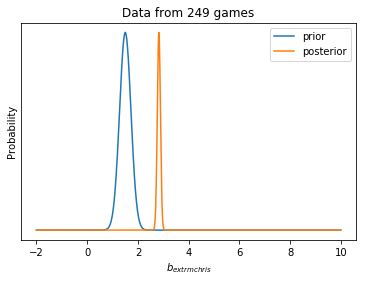

In [19]:
from pylab import *
import numpy
from scipy.stats import norm

x = arange(-2,10,0.01)
prior = norm(1.5,1/sqrt(20)).pdf(x)

N = 250
data = norm(3,1).rvs(N)

for i in range(1,N):
    clf()
    if (i == 0):
        posterior = prior.copy()
    else:
        posterior = prior * norm(data[0:i].mean(),1.0/sqrt(i)).pdf(x)
    title("Data from " + str(i) + " games")
    plot(x, prior / prior.max(), label="prior")
    plot(x, posterior / posterior.max(), label="posterior")
    xlabel("$ b_{\textrm{chris}} $")
    ylabel("Probability")
    yticks([])
    legend()
    savefig("img" + str(i).rjust(3,'0') + ".png")

In [106]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [14,6]

(array([[1.26291333]]), array([0.55056625]))

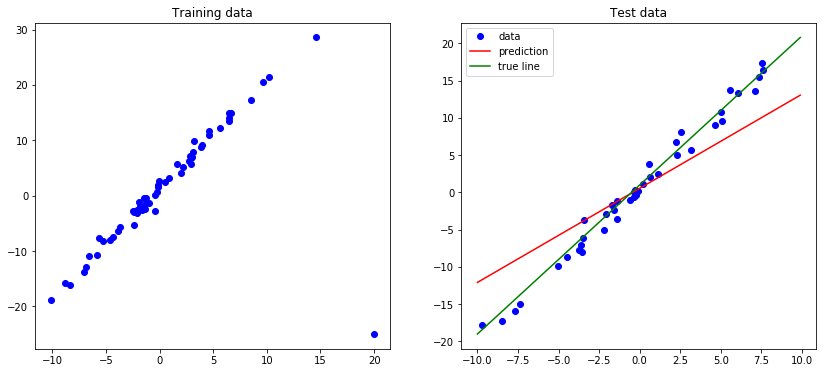

In [111]:
from sklearn.linear_model import *

N = 100

x = norm(0,5).rvs((N,1))
y = 2*x + norm(0,1).rvs((N,1)) + 1
x[20] = 20
y[20] = -25
#x[21] = -20
#y[21] = 20

lr = LinearRegression(fit_intercept=True)

k = 60

lr.fit(x[0:k], y[0:k])

subplot(121)
title("Training data")
plot(x[0:k], y[0:k], 'bo')
subplot(122)
title("Test data")
plot(x[k:], y[k:], 'bo', label='data')
tt = arange(-10,10,0.1)
plot(tt, lr.intercept_[0] + lr.coef_[0,0]*tt, 'r', label='prediction')
plot(tt, 1 + 2*tt, 'g', label='true line')
legend()

lr.coef_, lr.intercept_

(array([  7.17602206,   8.19509562, -10.3839866 ]), 0.8609805018923029)

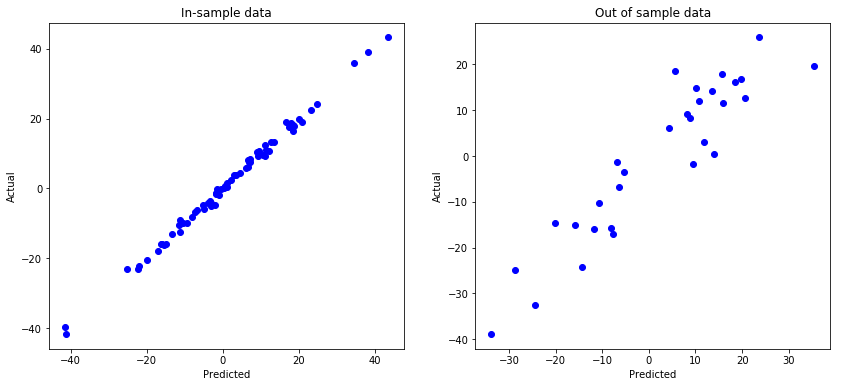

In [240]:
from sklearn.linear_model import *

N = 100
x = numpy.zeros(shape=(N,3), dtype=float)
x[:,0:2] = norm(0,5).rvs((N,2))
x[:,2] = 0.5*(x[:,0] + x[:,1]) + norm(0,0.01).rvs(N)
    
y = 2*x[:,0]+3*x[:,1] + norm(0,1).rvs(N) + 1
    
lr = LinearRegression(fit_intercept=True)

k = 70

lr.fit(x[0:k], y[0:k])

lr.coef_, lr.intercept_

subplot(121)
plot(lr.predict(x[0:k]), y[0:k], 'bo')
title("In-sample data")
xlabel("Predicted")
ylabel("Actual")

subplot(122)
title("Out of sample data")
xlabel("Predicted")
ylabel("Actual")
y[k:] = 1.96*x[k:,0] + 3.03*x[k:,1] + norm(0,1).rvs(N-k)
x[k:,2] = 0.4*x[k:,0] + 0.6*x[k:,1] + norm(0,0.01).rvs(N-k)
plot(lr.predict(x[k:]), y[k:], 'bo')
lr.coef_, lr.intercept_

      fun: 116.18068918822462
 hess_inv: array([[ 1.66544166,  1.66531567, -3.33061034],
       [ 1.66531567,  1.66567567, -3.33084272],
       [-3.33061034, -3.33084272,  6.66178994]])
      jac: array([7.62939453e-06, 4.76837158e-06, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 65
      nit: 7
     njev: 13
   status: 0
  success: True
        x: array([1.12705054, 2.07623114, 1.79182738])

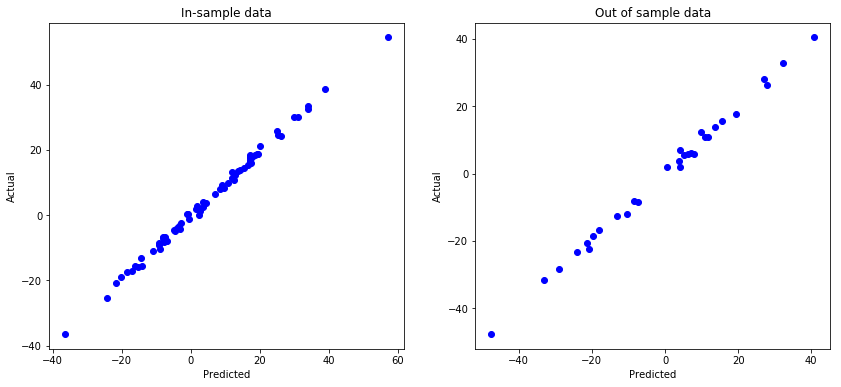

In [236]:
from scipy.optimize import minimize

N = 100
x = numpy.zeros(shape=(N,3), dtype=float)
x[:,0:2] = norm(0,5).rvs((N,2)) # First two features are random variables
x[:,2] = 0.5*(x[:,0] + x[:,1]) + norm(0,0.001).rvs(N) # almost linear combination!!!
y = 2*x[:,0]+3*x[:,1] + norm(0,1).rvs(N) + 1 # True model

def log_prior(a):
    return dot(a,a)/20

def log_likelihood(a, xx, yy):
    return pow(dot(xx, a) - yy, 2).sum()

k = int(0.7*N)

min_result = minimize(lambda a: log_prior(a) + log_likelihood(a, x[0:k], y[0:k]), x0 = [0,0,0])


subplot(121)
plot(lr.predict(x[0:k]), y[0:k], 'bo')
title("In-sample data")
xlabel("Predicted")
ylabel("Actual")

subplot(122)
title("Out of sample data")
xlabel("Predicted")
ylabel("Actual")
y[k:] = 1.96*x[k:,0] + 3.03*x[k:,1] + norm(0,1).rvs(N-k)
x[k:,2] = 0.4*x[k:,0] + 0.6*x[k:,1] + norm(0,0.01).rvs(N-k)
prediction = dot(x, min_result.x)
plot(prediction[k:], y[k:], 'bo')
min_result

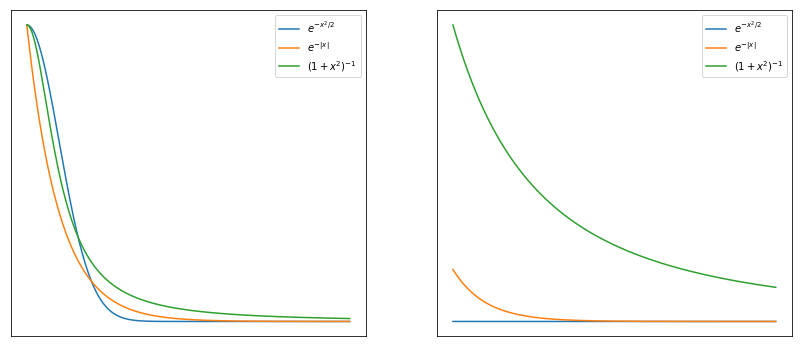

In [254]:
x = arange(0, 10, 0.01)
subplot(121)
plot(x, exp(-x*x/2), label="$e^{-x^2/2}$")
plot(x, exp(-x), label="$e^{-|x|}$")
plot(x, 1.0/(1+x**2), label="$(1+x^2)^{-1}$")
xticks([])
yticks([])
legend()
subplot(122)
x = arange(5,15, 0.01)
plot(x, exp(-x*x/2), label="$e^{-x^2/2}$")
plot(x, exp(-x), label="$e^{-|x|}$")
plot(x, 1.0/(1+x**2), label="$(1+x^2)^{-1}$")
xticks([])
yticks([])
legend()

 final_simplex: (array([[2.02910156],
       [2.02908936]]), array([150.86908336, 150.86917239]))
           fun: 150.86908335960993
       message: 'Optimization terminated successfully.'
          nfev: 44
           nit: 22
        status: 0
       success: True
             x: array([2.02910156])

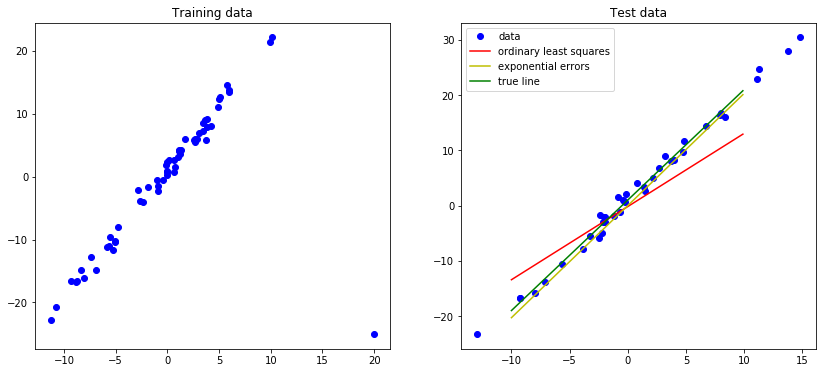

In [283]:
from sklearn.linear_model import *
from numpy.linalg import norm as vec_norm

N = 100

x = norm(0,5).rvs((N,1))
y = 2*x + norm(0,1).rvs((N,1)) + 1
x[20] = 20
y[20] = -25
#x[21] = -20
#y[21] = 20

lr = LinearRegression(fit_intercept=True)

def log_prior(a):
    return dot(a,a)/20

def log_likelihood(a, xx, yy):
    return vec_norm(a*xx - yy, 1).sum()

k = int(0.7*N)

min_result = minimize(lambda a: log_likelihood(a, x[0:k], y[0:k]), x0 = [.5], method='nelder-mead')

k = 60

lr.fit(x[0:k], y[0:k])

subplot(121)
title("Training data")
plot(x[0:k], y[0:k], 'bo')
subplot(122)
title("Test data")
plot(x[k:], y[k:], 'bo', label='data')
tt = arange(-10,10,0.1)
plot(tt, lr.intercept_[0] + lr.coef_[0,0]*tt, 'r', label='ordinary least squares')
plot(tt, min_result.x[0]*tt, 'y', label='exponential errors')
plot(tt, 1 + 2*tt, 'g', label='true line')
legend()

min_result

In [290]:
def pctd(d, p):
    return minimize(lambda x: abs(d.cdf(x) - p), x0=[0], method='nelder-mead').x[0]

pctd(expon(), 0.99)

4.605187500000005